Extracted from [here](https://youtu.be/IiOSxaF5oxo).

In [1]:
install.packages('xts')
install.packages('qrmdata')
install.packages('qrmtools')
library(xts) # for functions around time series objects
library(qrmdata) # for the S&P 500 data
library(qrmtools) # for returns()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘TTR’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’, ‘quantmod’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



                 [,1]
1987-10-16 0.05297556

                [,1]
1987-10-19 0.2289973

                 [,1]
1987-10-16 0.05159681

                [,1]
1987-10-19 0.2046693

[1] 0.09120132

               ^GSPC
1987-10-19 0.7953307

[1] 0.2970806

[1] 0.02054776

[1] 0.00738642

shape         loc       scale 
0.216335152 0.001676302 0.001242566

[1] 0.3400842

[1] 0.01693855

[1] 0.005587488

shape          loc        scale 
0.1450895278 0.0008416443 0.0005382881

[1] 0.02580612

[1] 0.0148595

[1] 0.04420243

[1] 0.07493265

[1] 0.04562354

[1] 0.0790427

[1] 1875.991

[1] 2299.932

[1] -7.083291e-17

$par
     shape        loc      scale 
0.32646244 0.01713679 0.00580562 

$value
[1] 191.2701

$counts
function gradient 
      58        8 

$convergence
[1] 0

$message
NULL

$hessian
            [,1]         [,2]         [,3]
[1,]   -56.72621    -5427.364     4886.675
[2,] -5427.36409 -2798099.425  2636073.565
[3,]  4886.67491  2636073.565 -5226847.069

$Cov
              shape           loc         scale
shape  2.165427e-02 -4.368558e-05 -1.787125e-06
loc   -4.368558e-05  7.690341e-07  3.470071e-07
scale -1.787125e-06  3.470071e-07  3.646564e-07

$SE
       shape          loc        scale 
0.1471538900 0.0008769459 0.0006038679

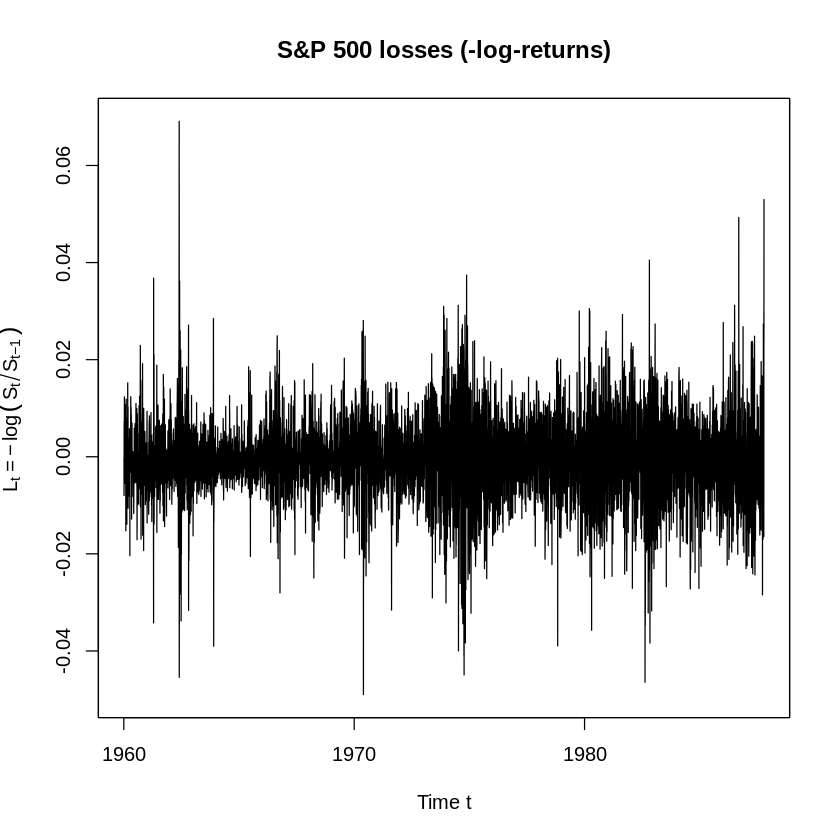

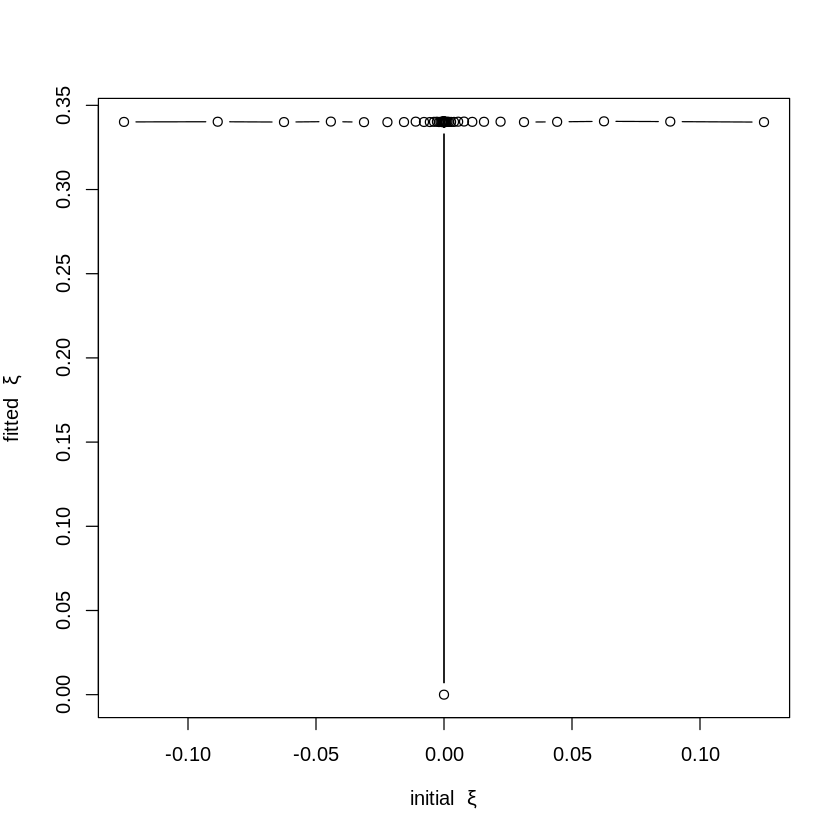

$par
      shape         loc       scale 
0.340084242 0.016938547 0.005587488 

$value
[1] 191.3122

$counts
function gradient 
     134       NA 

$convergence
[1] 0

$message
NULL

$hessian
            [,1]         [,2]         [,3]
[1,]   -61.30981    -6559.188     6416.038
[2,] -6559.18798 -3117747.521  3121976.272
[3,]  6416.03770  3121976.272 -6577899.549

$Cov
              shape           loc         scale
shape  2.105097e-02 -4.521606e-05 -9.272949e-07
loc   -4.521606e-05  7.083651e-07  2.920980e-07
scale -9.272949e-07  2.920980e-07  2.897541e-07

$SE
       shape          loc        scale 
0.1450895278 0.0008416443 0.0005382881

$par
      shape         loc       scale 
0.339954770 0.016938305 0.005586704 

$value
[1] 191.3122

$counts
function gradient 
     132       NA 

$convergence
[1] 0

$message
NULL

$hessian
            [,1]         [,2]         [,3]
[1,]   -61.35173    -6560.156     6413.752
[2,] -6560.15591 -3117871.840  3122262.119
[3,]  6413.75171  3122262.119 -6580382.181

$Cov
              shape           loc         scale
shape  2.103411e-02 -4.520604e-05 -9.478991e-07
loc   -4.520604e-05  7.082459e-07  2.919875e-07
scale -9.478991e-07  2.919875e-07  2.895853e-07

$SE
       shape          loc        scale 
0.1450314080 0.0008415735 0.0005381313

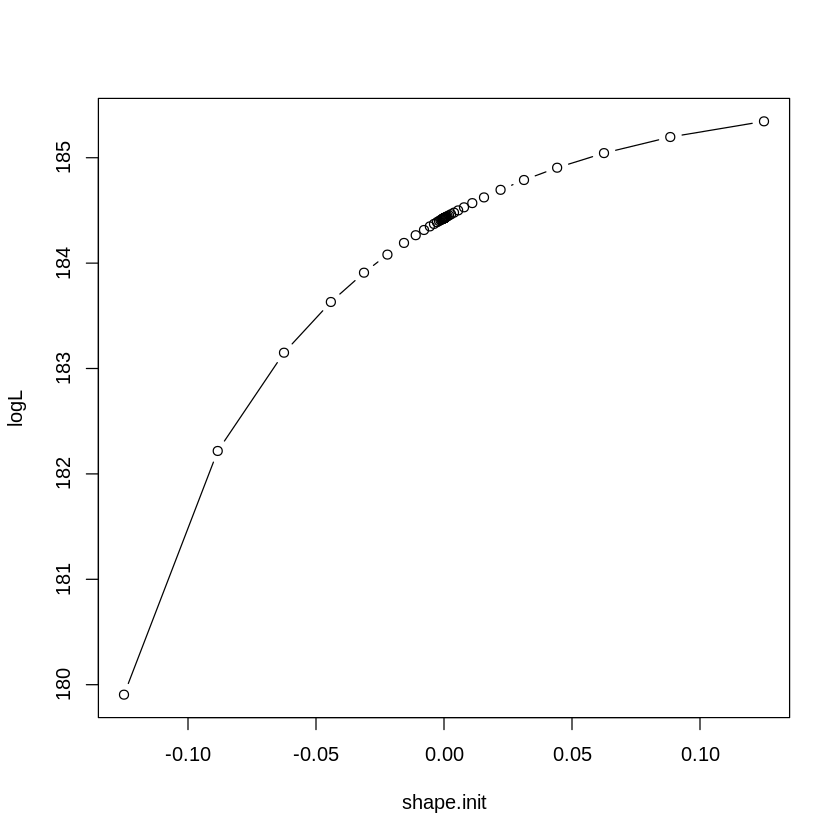

In [2]:
## By Marius Hofert

## 1) Compute the probability of next year's maximal risk-factor change
##    exceeding all previous ones via the BBM based on S&P 500 data;
##    see MFE (2015, Example 5.12).
## 2) Compute a return level;  see MFE (2015, Example 5.15)
## 3) Compute a return period; see MFE (2015, Example 5.15)

## Note: Different databases can (and indeed do) provide different stock values
##       for the S&P 500. The data below (from qrmdata) is from finance.yahoo.com
##       and thus our computed values differ from the values reported
##       in MFE (2015). Also, we (mostly) work with log-returns
##       instead of classical returns here.




### 1 Working with the data ####################################################

## Load the data and compute the losses
data(SP500) # load the S&P 500 data
S <- SP500 # 'xts'/'zoo' object
X <- returns(S) # log-returns X_t = log(S_t/S_{t-1}) as risk factor changes
L <- -X # losses
stopifnot(all.equal(L, -diff(log(S))[-1], check.attributes = FALSE))

## Let's briefly work out some numbers around next Monday (= Black Monday!)
L['1987-10-16'] # ~=  5.3%; risk-factor change on the Friday before Black Monday
L['1987-10-19'] # ~= 22.9%; risk-factor change on Black Monday!

## Let's briefly consider negative classical instead of -log-returns
## Note: A change of beta from yesterday's value to today's satisfies
##       S_t = (1 + beta) * S_{t-1} => Y_t = -(S_t/S_{t-1}-1) = -beta
##       => The negative classical returns Y_t give exactly the drop beta (= -beta)
Y <- -returns(S, method = "simple") # classical negative returns
stopifnot(all.equal(Y, -diff(S)[-1]/as.numeric(S[-length(S)]),
                    check.attributes = FALSE))
Y['1987-10-16'] # ~=  5.16% (drop)
Y['1987-10-19'] # ~= 20.47% (drop)

## To see the same change from -log-returns, note that L_t = -log(S_t/S_{t-1})
## = -log(1+beta) => -beta = -(exp(-L_t)-1) = -expm1(-L_t),
## so negative classical returns can be obtained from -log-returns via -expm1(-.)
stopifnot(all.equal(-expm1(-L['1987-10-16']), Y['1987-10-16'], check.attributes = FALSE))
stopifnot(all.equal(-expm1(-L['1987-10-19']), Y['1987-10-19'], check.attributes = FALSE))
## ... and over a time period: The drop (= loss) from (end of) Mon 1987-10-12
## to (end of) Fri 1987-10-16 can be obtained via -expm1(-sum(.)):
## Note: S_t/S_{t-4} = S_t/S_{t-1} * S_{t-1}/S_{t-2} ... * S_{t-3}/S_{t-4}
##       = exp(-L_t) * exp(-L_{t-1}) * ... * exp(-L_{t-3}) = exp(-sum(L_i, i=t-3,..,t))
##       => (Positive drop) -beta = -(S_t/S_{t-4}-1) = -(exp(-sum(L_i, i=t-3,..,t))-1)
-expm1(-sum(L['1987-10-12/1987-10-16'])) # ~= 9.12% (drop)

## Does working with either notion of (classical/log-)returns matter?
## The tangent to the curve log(x) in 1 is x - 1.
## 1) Near 1, log(x) ~ x - 1. So if S_t/S_{t-1} ~= 1 (so beta ~= 0),
##    then log(S_t/S_{t-1}) is roughly S_t/S_{t-1} - 1
##    => It does not matter much with which version one works
## 2) However, "Friday before Black Monday" S_t differs substantially from S_{t-1}
##    so it can/does matter:
(x <- S["1987-10-19"]/as.numeric(S["1987-10-16"])) # S_t/S_{t-1} ~= 0.7953
stopifnot(all.equal(-(x - 1), Y['1987-10-19'], # classical -return; ~= 0.2047
                    check.attributes = FALSE))
stopifnot(all.equal(-log(x),  L['1987-10-19'], # -log-return;       ~= 0.2290
                    check.attributes = FALSE))
## => Difference of 2.43%.
##    Since log(x) <= x - 1, classical returns are larger than log-returns
##    and so -log-returns are larger than negative classical returns.

## From now on we only consider the -log-returns from 1960-01-01 until
## the evening of 1987-10-16
L. <- L['1960-01-01/1987-10-16']

## Plot the S&P 500 -log-returns
plot.zoo(L., main = "S&P 500 losses (-log-returns)",
         xlab = "Time t", ylab = expression(L[t] == -log(S[t]/S[t-1])))
## One would need to fit a time series model to L. (e.g., GARCH process), but
## we omit that here.


### 2 Block Maxima Method (BMM) ################################################

## Extract (half-)yearly maxima
M.y <- period.apply(L., INDEX = endpoints(L., "years"), FUN = max) # yearly maxima
endpts <- endpoints(L., "quarters") # end indices for quarters
endpts <- endpts[seq(1, length(endpts), by = 2)] # end indices for half-years
M.hy <- period.apply(L., INDEX = endpts, FUN = max) # half-yearly maxima

## Fit the GEV distribution H_{xi,mu,sigma} to the (half-)yearly maxima

## Yearly maxima
fit.y <- fit_GEV_MLE(M.y) # maximum likelihood estimator
stopifnot(fit.y$convergence == 0) # => converged
(xi.y <- fit.y$par[["shape"]]) # ~= 0.2971 => Frechet domain with infinite ceiling(1/xi.y) = 4th moment
(mu.y  <- fit.y$par[["loc"]])
(sig.y <- fit.y$par[["scale"]])
fit.y$SE # standard errors

## Half-yearly maxima
fit.hy <- fit_GEV_MLE(M.hy)
stopifnot(fit.hy$convergence == 0) # => converged
(xi.hy <- fit.hy$par[["shape"]]) # ~= 0.3401 => Frechet domain with infinite ceiling(1/xi.hy) = 3rd moment
(mu.hy  <- fit.hy$par[["loc"]])
(sig.hy <- fit.hy$par[["scale"]])
fit.hy$SE # standard errors


### 3 Compute exceedance probabilities, return levels and return periods #######

## Q: What is the probability that next year's maximal risk-factor change
##    exceeds all previous ones?
1-pGEV(max(head(M.y,  n = -1)), shape = xi.y,  loc = mu.y,  scale = sig.y)  # exceedance prob. ~= 2.58%
1-pGEV(max(head(M.hy, n = -1)), shape = xi.hy, loc = mu.hy, scale = sig.hy) # exceedance prob. ~= 1.49%
## Note: mu and sig also differ for half-yearly vs yearly data; if it was only xi,
##       the exceedance probability based on half-yearly data would be estimated
##       larger than the one based on yearly data (as xi is larger => heavier tailed GEV)

## Q: What is the 10-year and 50-year return level? ... so the loss we expect
##    to be exceeded once every 10 (or 50) years.
##    Recall: k n-block return level = r_{n,k} = H^-(1-1/k) = level which is
##            expected to be exceeded in one out of every k n-blocks.
qGEV(1-1/10, shape = xi.y, loc = mu.y, scale = sig.y) # r_{n = 260, k = 10} ~= 4.42%; n ~ 1y
qGEV(1-1/50, shape = xi.y, loc = mu.y, scale = sig.y) # r_{n = 260, k = 50} ~= 7.49%
## 20-half-year and 100-half-year return levels
qGEV(1-1/20,  shape = xi.hy, loc = mu.hy, scale = sig.hy) # r_{n = 130, k = 20}  ~= 4.56%; n ~ 1/2y
qGEV(1-1/100, shape = xi.hy, loc = mu.hy, scale = sig.hy) # r_{n = 130, k = 100} ~= 7.90%
## => Close to r_{n = 260, k = 10} and r_{n = 260, k = 50}, respectively (reassuring).

## Q: What is the return period of a risk-factor change at least as large as
##    on Black Monday? ... so the number of n-blocks for which we expect to see
##    at least one of them exceeding a loss as large as on Black Monday.
##    Recall: k_{n,u} = 1/\bar{H}(u) = period (= number of n-blocks) in which we
##            expect to see a single n-block exceeding u (= risk-factor change
##            as on Black Monday)
1/(1-pGEV(as.numeric(L['1987-10-19']),
          shape = xi.y, loc = mu.y, scale = sig.y)) # ~= 1876 years
1/(1-pGEV(as.numeric(L['1987-10-19']),
          shape = xi.hy, loc = mu.hy, scale = sig.hy)) # ~= 2300 half-years = 1150 years


### 4 Behind the scenes ########################################################

## Note:
## 1) Fitting a GEV via MLE needs initial values. One (of multiple) problem(s) is
##    that for xi != 0, we need 1 + xi * (x - mu) / sigma > 0 for *all* data points
##    x in order for the density to be positive and thus the log-likelihood to be
##    finite.
## 2) A cheap solution is to use the case xi = 0 as initial values. So xi = 0,
##    sigma = sqrt(6 * var(x)) / pi and mu = mean(x) - sigma * gam in this case,
##    where gam = 0.5772157 (= -digamma(1)) denotes the Euler--Mascheroni constant.
## 3) This is no problem for x = M.y, however, it is a problem for x = M.hy as we
##    now explore a bit.
## 4) These types of numerical explorations are important for many practical
##    problems. It is always good to keep an eye on numerics...

## Fit based on half-yearly maxima with the case 'xi = 0' as initial values
x <- M.hy # for simplicity
scale.init <- sqrt(6 * var(x)) / pi # initial sigma for the 'xi = 0' case
loc.init <- mean(x) - scale.init * 0.5772157
init <- c(0, loc.init, scale.init) # initial xi, mu, sigma
fit.hy. <- fit_GEV_MLE(M.hy, init = init) # maximum likelihood estimator
stopifnot(fit.hy.$convergence == 0) # => converged, but...
fit.hy.$par[["shape"]] # => ~= -7e-17, suspicious shape
if(FALSE)
    ## Let's look at a trace
    fit_GEV_MLE(M.hy, init = init, control = list(trace = TRUE)) # => nothing obvious
    ## On a second thought (comparing the log-likelihoods below (~ 191) with the
    ## ones of this trace), Nelder--Mead seems to 'jump' on the second reflection.

## Check a different optimizer
fit_GEV_MLE(M.hy, init = init, method = "BFGS") # ~= 0.3265 => ok

## Check a whole sequence of xi's (for the same mu, sigma)
s <- 2^(-seq(3, 20, by = 0.5)) # sequence concentrating near 0
shape.init <- c(-s, 0, rev(s)) # sequence concentrating around 0
fit.hy.xis <- lapply(shape.init, function(xi) fit_GEV_MLE(M.hy, init = c(xi, init[2:3])))
stopifnot(sapply(fit.hy.xis, function(f) f$convergence) == 0) # => converged
shape.fit <- lapply(fit.hy.xis, function(f) f$par[["shape"]]) # fitted xi's
plot(shape.init, shape.fit, type = "b",
     xlab = expression("initial"~xi), ylab = expression("fitted"~xi))
## => The optimization method Nelder--Mead fails exactly for xi = 0...

## ... with no obvious reason (at least not when looking at the log-likelihood
## as a function of xi
logL <- sapply(shape.init, function(xi) logLik_GEV(c(xi, init[2:3]), M.hy))
plot(shape.init, logL, type = "b") # => ok; see also 'logL'

## For initial |xi| small but nonzero, fitting works.
fit_GEV_MLE(M.hy, init = c( .Machine$double.eps^0.25, init[2:3])) # ~= 0.3401 => ok
fit_GEV_MLE(M.hy, init = c(-.Machine$double.eps^0.25, init[2:3])) # ~= 0.3400 => ok
## ... and this and another trick are in fact used internally.
## In some other R packages, initial xi are more brutally set as 0.1.

## Note:
## 1) fit_GEV_MLE() internally also provides more algorithms for finding
##    initial values, and they also (roughly) lead to xi ~= 0.3402.
## 2) The problem overall is significantly more severe and challenging
##    when computing profile log-likelihood based confidence intervals
##    for return levels and return periods; see the script
##    05_GEV_BMM_SP500_CIs_rlevels_rperiods.R